# SVM hard-margin

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [13]:
from cvxopt import matrix
from cvxopt import solvers
import numpy as np



# Go through the detail

first we will generate a dataset that linearly separable.

In [14]:
    mean1 = np.array([2,4])
    mean2 = np.array([2,0])

    #from this, i create two datas x1 and y1 is for the positive, x2 and y2 is for the negative. 
    cov = np.array([[0.5,-0.6],[-0.6,0.5]])
    #x1 has 2 value x-axis and y-axis ,goes the same for x2
    #y1 has 1 value label= 1 and y2 has label value = -1 
    X1 = np.random.multivariate_normal(mean1, cov, 100)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, 100)
    y2 = np.ones(len(X2)) * -1
    
        

C:\Users\62819\AppData\Local\Temp\ipykernel_5928\2380190418.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal(mean1, cov, 100)
C:\Users\62819\AppData\Local\Temp\ipykernel_5928\2380190418.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean2, cov, 100)


In [15]:
X1[:,1]

array([4.71073092, 2.87040267, 3.37755662, 4.32625672, 3.51456087,
       4.01284922, 3.6375083 , 5.95725243, 3.51725001, 3.96473245,
       4.93710767, 3.54759266, 3.75544781, 3.28288196, 3.80815492,
       3.69135919, 4.01430936, 4.50731143, 2.74498775, 2.93900879,
       3.06902192, 3.51764713, 4.23812997, 4.04003871, 3.23161277,
       4.76957569, 4.50164818, 3.96351997, 5.02640035, 5.09213376,
       3.19956216, 4.56433987, 3.77969238, 3.95373355, 4.43427171,
       3.99638195, 5.08030311, 4.58511736, 3.25922927, 2.99893906,
       4.81971455, 3.58884597, 4.8500838 , 4.34126109, 3.66794792,
       4.06088808, 3.22854785, 2.45632813, 3.81027695, 3.76812886,
       4.19542979, 3.94017664, 4.73380616, 3.28203562, 4.87915777,
       4.11680781, 1.94550997, 4.83540226, 2.49652097, 4.27682712,
       3.98932768, 3.04316118, 3.97029747, 4.395546  , 4.15507956,
       3.989458  , 4.20019976, 4.23414128, 5.55983243, 2.9596822 ,
       3.46165078, 4.52952457, 4.9299679 , 4.95991657, 3.89531

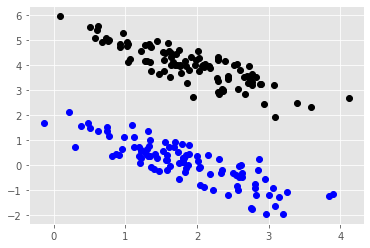

In [16]:
import matplotlib.pyplot as plt




plt.plot(X1[:,0],X1[:,1],'o',color='black')
plt.plot(X2[:,0],X2[:,1],'o',color='blue')

In [17]:
def split_train(X1,y1,X2,y2):
    #we get fetch train-data from both positive and negative label
    #we get fetch 80 datas(1-80) from each of them
    X1_train = X1[:80]
    y1_train = y1[:80]
    
    X2_train = X2[:80]
    y2_train = y2[:80]
    
    #Tumpukan vertikal
    X_train = np.vstack((X1_train,X2_train))
    #tumpukan horizontal
    y_train = np.hstack((y1_train,y2_train))
    
    return X_train,y_train

In [18]:
x_train,y_train = split_train(X1,y1,X2,y2)

In [19]:
n_samples = x_train.shape[0]

K = np.zeros((n_samples,n_samples))

In [20]:
n_samples

160

there is three kernel that usually used with SVM (linear ,RBF,Gaussian). but we should just choose linear to make thing simpler.

In [21]:
def linear_kernel(X1, X2):
    return np.dot(X1, X2)

k = np.zeros((n_samples,n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i,j] = linear_kernel(x_train[i],x_train[j])
        

In [22]:
print(K)

[[24.0304772  16.64699372 19.02896959 ... -0.95424723  6.51299973
  -0.33528028]
 [16.64699372 13.54910008 14.99279037 ...  2.43179165  5.94941533
   3.57085007]
 [19.02896959 14.99279037 16.69371311 ...  2.02069123  6.44788773
   3.14841639]
 ...
 [-0.95424723  2.43179165  2.02069123 ...  4.78046842  1.94574058
   5.84502337]
 [ 6.51299973  5.94941533  6.44788773 ...  1.94574058  2.78982543
   2.61973424]
 [-0.33528028  3.57085007  3.14841639 ...  5.84502337  2.61973424
   7.17564141]]


In [23]:
P = matrix(np.outer(y_train,y_train)*K)

In [24]:
print(P)

[ 2.40e+01  1.66e+01  1.90e+01  2.30e+01  2.02e+01  2.23e+01  2.09e+01 ... ]
[ 1.66e+01  1.35e+01  1.50e+01  1.68e+01  1.62e+01  1.73e+01  1.68e+01 ... ]
[ 1.90e+01  1.50e+01  1.67e+01  1.90e+01  1.80e+01  1.93e+01  1.87e+01 ... ]
[ 2.30e+01  1.68e+01  1.90e+01  2.24e+01  2.03e+01  2.22e+01  2.10e+01 ... ]
[ 2.02e+01  1.62e+01  1.80e+01  2.03e+01  1.94e+01  2.08e+01  2.02e+01 ... ]
[ 2.23e+01  1.73e+01  1.93e+01  2.22e+01  2.08e+01  2.24e+01  2.16e+01 ... ]
[ 2.09e+01  1.68e+01  1.87e+01  2.10e+01  2.02e+01  2.16e+01  2.09e+01 ... ]
[ 2.82e+01  1.73e+01  2.03e+01  2.59e+01  2.12e+01  2.41e+01  2.19e+01 ... ]
[ 2.04e+01  1.66e+01  1.84e+01  2.06e+01  1.99e+01  2.12e+01  2.06e+01 ... ]
[ 2.15e+01  1.61e+01  1.81e+01  2.11e+01  1.94e+01  2.11e+01  2.01e+01 ... ]
[ 2.42e+01  1.57e+01  1.82e+01  2.26e+01  1.91e+01  2.15e+01  1.98e+01 ... ]
[ 2.00e+01  1.58e+01  1.76e+01  2.00e+01  1.89e+01  2.03e+01  1.96e+01 ... ]
[ 1.98e+01  1.43e+01  1.62e+01  1.92e+01  1.73e+01  1.90e+01  1.79e+01 ... ]

In [25]:
P.size 

(160, 160)

In [26]:
q = matrix(np.ones(n_samples)*-1)
print(q)

[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.

In [27]:
A = matrix(y_train,(1,n_samples),'d')
print(A)

[ 1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00 ... ]



In [28]:
b = matrix(0.0)
print(b)

[ 0.00e+00]



Because we choosing linearly-separable data. we should make C = 0.
we could say that C is regularization parameter that control how much we allow for some training examples to be incorrectly classified

In [29]:
C = 0 

#if C=0 then its hard-margin if not then soft-margin
if C is None or C == 0:
    G = matrix(np.diag(np.ones(n_samples)* -1))
    h = matrix(np.zeros(n_samples))
    
else:
    tmp1 = np.diag(np.ones(n_samples) * -1)
    tmp2 = np.identity(n_samples)
    G = matrix(np.vstack((tmp1,tmp2)))
    tmp1 = np.zeros(n_samples)
    tmp2 = np.ones(n_samples)*self.C
    h = matrix(np.hstack((tmp1,tmp2)))

In [30]:
print(G)
print(h)

[-1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]

In [31]:
G.size

(160, 160)

In [32]:
h.size

(160, 1)

In [33]:
solvers.options['show_progress'] = True
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-10
solvers.options['feastol'] = 1e-10

According to documentation in CVXOPT library , they use this form(min(1/2).x^T.P.X + q^T.X ) to calculate the optimization.

so, we need to modify our form in SVM-dual to become min(1/2).x^T.P.X + q^T.X  .

In [35]:
"""
    min (1/2).x^T.P.X + q^T.X
    X = α (X = the value that our solvers trying to find)
    P = y.x 
    q = 1 
remember that X and x is different thing. X is parameter that we assign as α and x is input-samples
    s.t Gx < h
    Ax = b 
    A = y (for restriction condition)
    b = 0 (for restriction condition)
    G = -1(for restriction condition)
    h = 0 (for restriction condition)
"""

solution = solvers.qp(P,q,G,h,A,b)

     pcost       dcost       gap    pres   dres
 0: -7.4549e+00 -1.2667e+01  4e+02  2e+01  2e+00
 1: -4.1823e+00 -2.1066e+00  3e+01  1e+00  1e-01
 2: -4.7790e-01 -1.3530e+00  2e+00  6e-02  5e-03
 3: -6.4613e-01 -9.8982e-01  6e-01  2e-02  1e-03
 4: -7.8988e-01 -9.9957e-01  3e-01  4e-03  3e-04
 5: -9.7842e-01 -9.8850e-01  1e-02  5e-05  5e-06
 6: -9.8651e-01 -9.8663e-01  1e-04  5e-07  5e-08
 7: -9.8661e-01 -9.8662e-01  1e-06  5e-09  5e-10
 8: -9.8662e-01 -9.8662e-01  1e-08  5e-11  5e-12
 9: -9.8662e-01 -9.8662e-01  1e-10  5e-13  5e-14
10: -9.8662e-01 -9.8662e-01  1e-12  5e-15  4e-15
Optimal solution found.


In [36]:
solution

{'x': <160x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <160x1 matrix, tc='d'>,
 'z': <160x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.3123438541692725e-12,
 'relative gap': 1.3301474846479042e-12,
 'primal objective': -0.9866152959095777,
 'dual objective': -0.9866152959108064,
 'primal infeasibility': 5.383220750661234e-15,
 'dual infeasibility': 4.498739826497549e-15,
 'primal slack': 3.3279387341189797e-15,
 'dual slack': 6.854251682265244e-14,
 'iterations': 10}

In [37]:
alpha = np.ravel(solution['x'])

In [38]:
alpha

array([3.54231502e-15, 1.50834014e-14, 6.32188210e-15, 3.56639664e-15,
       4.28692580e-15, 3.53343981e-15, 3.86175274e-15, 2.90342336e-15,
       4.02401483e-15, 4.17553478e-15, 4.33602372e-15, 4.73223239e-15,
       7.93201189e-15, 1.18995259e-14, 3.74001798e-15, 6.87552964e-15,
       3.98609673e-15, 3.56294438e-15, 9.86615296e-01, 1.31449667e-14,
       7.33975665e-15, 1.05863880e-14, 6.62522799e-15, 3.48655718e-15,
       4.73159855e-15, 3.43828205e-15, 3.69517333e-15, 3.98632333e-15,
       3.79643564e-15, 4.02720165e-15, 4.40847434e-15, 3.48888753e-15,
       5.01510028e-15, 4.79903467e-15, 3.62888947e-15, 5.07218631e-15,
       3.73634815e-15, 3.18891197e-15, 4.58326995e-15, 1.07331131e-14,
       3.44263424e-15, 4.03625758e-15, 3.97595943e-15, 3.97200271e-15,
       9.73905880e-15, 3.82803343e-15, 5.08611481e-15, 1.48441216e-14,
       5.41714207e-15, 9.52420703e-15, 4.75248128e-15, 4.17957136e-15,
       4.38947356e-15, 5.03285213e-15, 3.09207259e-15, 4.69267272e-15,
      

In [39]:
w = np.dot(np.ravel(matrix(y_train*alpha)),x_train)

In [40]:
print(w)

[0.83639481 1.1285718 ]


In [41]:
#any data-points satisfying "Σαi.yi = 0 " is a support vector
#its will have a form : ys(Σαm.ym.Xm.Xs + b)= 1 (s notation indices data point that became support vector).
S = (alpha>1e-2).flatten()

In [42]:
np.ravel

<function numpy.ravel(a, order='C')>

In [43]:
S

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [44]:
y_train[S]

array([ 1., -1.])

In [45]:
x_train[S]

array([[1.94455363, 2.74498775],
       [1.09681205, 1.60110542]])

In [46]:
#y.(w.x+b) = 1 
#so, for b its  y^2(w.x+b) = y, which equal to 1.(w.x+b) = y 
#                                                b = y-w.x
b = y_train[S]-np.dot(x_train[S],w)

In [47]:
b 

array([-3.72433034, -3.72433034])

In [48]:
#because we know y.(w.x+b) = 1 for x that is support vector
#and now we have 3 support vectors
#and since we know, that b is only one value. all of b that is correspond from x will be the same.
b = b[0]


the question is how can all b = y-w.x from 3 supportvector result in same b? 

that's because w.x each x that being dotted product to w. has the same value.
ex. w = [1 2] x1 = [3 1]  x2= [1 2]

w.x1 = (1.3)+(2.1) = 5

w.x2 = (1.1)+(2.2) = 5

thats it..the result of w.x1 and w.x2 is the same. even thought x1 and x2 are different and w value for x1 and x2 doesnt change

In [49]:
print("b value",b)
print("w value",w)

b value -3.724330335147049
w value [0.83639481 1.1285718 ]


[ 1.20e+01  1.88e+01  1.28e+01  1.08e+01  1.50e+01  1.53e+01  1.50e+01 ... ]
[ 1.88e+01  3.31e+01  2.20e+01  1.95e+01  2.25e+01  2.87e+01  2.43e+01 ... ]
[ 1.28e+01  2.20e+01  1.48e+01  1.30e+01  1.54e+01  1.90e+01  1.64e+01 ... ]
[ 1.08e+01  1.95e+01  1.30e+01  1.16e+01  1.29e+01  1.71e+01  1.42e+01 ... ]
[ 1.50e+01  2.25e+01  1.54e+01  1.29e+01  1.88e+01  1.79e+01  1.84e+01 ... ]
[ 1.53e+01  2.87e+01  1.90e+01  1.71e+01  1.79e+01  2.57e+01  2.03e+01 ... ]
[ 1.50e+01  2.43e+01  1.64e+01  1.42e+01  1.84e+01  2.03e+01  1.89e+01 ... ]
[ 1.33e+01  2.51e+01  1.65e+01  1.50e+01  1.56e+01  2.24e+01  1.77e+01 ... ]
[ 1.30e+01  2.34e+01  1.56e+01  1.38e+01  1.56e+01  2.05e+01  1.70e+01 ... ]
[ 1.34e+01  2.46e+01  1.63e+01  1.47e+01  1.58e+01  2.18e+01  1.77e+01 ... ]
[ 1.45e+01  2.86e+01  1.87e+01  1.72e+01  1.67e+01  2.61e+01  1.96e+01 ... ]
[ 1.64e+01  2.93e+01  1.95e+01  1.74e+01  1.95e+01  2.57e+01  2.14e+01 ... ]
[ 1.24e+01  2.00e+01  1.36e+01  1.17e+01  1.52e+01  1.67e+01  1.56e+01 ... ]

In [136]:
P2.size

(160, 160)

In [137]:
A2 = matrix(y_train_2,(1,n_samples2),'d')
print(A2)

[ 1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00 ... ]



In [138]:
q2 = matrix(np.ones(n_samples2)*-1)
print(q2)

[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.

In [139]:
b2 = matrix(0.0)
print(b2)

[ 0.00e+00]



In [156]:
C = 5

if C is None or C==0:
    G = matrix(np.diag(np.ones(n_samples2)*-1))
    h = matrix(np.zeros(n_samples2))
    
else:
    temp1_1 = np.diag(np.ones(n_samples2)*-1)
    temp2_1 = np.identity(n_samples2)
    G = matrix(np.vstack((temp1_1,temp2_1)))
    temp1_2 = np.zeros(n_samples2)
    temp2_2 = np.ones(n_samples2)*C
    h = matrix(np.hstack((temp1_2,temp2_2)))

In [157]:
print(G)

[-1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]

In [158]:
temp2_1.size

25600

In [159]:
G

<320x160 matrix, tc='d'>

In [160]:
print(h)

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.

In [161]:
h

<320x1 matrix, tc='d'>

In [162]:
solution2 = solvers.qp(P2,q2,G,h,A2,b2)

     pcost       dcost       gap    pres   dres
 0: -7.9042e+01 -2.5737e+03  7e+03  8e-01  2e-13
 1: -3.9945e+01 -6.0069e+02  9e+02  7e-02  1e-13
 2: -2.0334e+01 -1.3913e+02  2e+02  1e-02  6e-14
 3: -2.1963e+01 -6.4362e+01  5e+01  4e-03  4e-14
 4: -2.4989e+01 -4.1828e+01  2e+01  1e-03  4e-14
 5: -2.8081e+01 -3.8474e+01  1e+01  4e-04  5e-14
 6: -2.7150e+01 -3.6373e+01  1e+01  2e-04  4e-14
 7: -2.7420e+01 -3.6112e+01  9e+00  1e-04  4e-14
 8: -2.9924e+01 -3.2134e+01  2e+00  3e-05  5e-14
 9: -3.0731e+01 -3.0793e+01  6e-02  3e-07  6e-14
10: -3.0756e+01 -3.0759e+01  3e-03  1e-08  6e-14
11: -3.0757e+01 -3.0757e+01  3e-05  1e-10  7e-14
12: -3.0757e+01 -3.0757e+01  3e-07  1e-12  6e-14
13: -3.0757e+01 -3.0757e+01  3e-09  1e-14  6e-14
Optimal solution found.


In [163]:
alpha_2 = np.ravel(solution2['x'])

In [164]:
w_2 = np.dot(np.ravel(matrix(y_train_2*alpha_2)),x_train_2)

In [165]:
print(w_2)

[0.99672801 1.72286298]


In [172]:
S_2 = (alpha_2>1e-1).flatten()

In [173]:
S_2

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [174]:
y_train_2[S_2]

array([ 1.,  1.,  1.,  1., -1., -1., -1., -1.])

In [175]:
x_train_2[S_2]

array([[2.61518   , 2.27987033],
       [2.3793881 , 2.20940845],
       [1.78987286, 2.44284414],
       [0.7991265 , 2.4096592 ],
       [0.67397726, 3.74126194],
       [0.98098989, 2.06443999],
       [2.91136741, 0.94765859],
       [2.19469738, 1.76139736]])

In [176]:
b_2 = y_train_2[S_2] - np.dot(x_train_2[S_2],w_2)

In [177]:
b_2

array([-5.53452734, -5.17811079, -4.99270215, -3.94802438, -8.1174537 ,
       -5.53452734, -5.53452734, -6.22216265])